In [1]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import random
import time
import sys
from matplotlib import rcParams
from scipy.linalg import eigh
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib as mpl
import seaborn as sns


import statsmodels.formula.api as smf

mpl.rcParams['figure.dpi'] = 300 
plt.rc('text',usetex=True)

Matrizes relevantes: 

$$\mathbf{Y}=\left[\begin{array}{c}
Y_{1}\\
Y_{2}\\
\vdots\\
Y_{n}
\end{array}\right] \mbox{(respostas)}, \; \mathbb{X}=\left[\begin{array}{ccccc}
1 & X_{11} & X_{12} & \cdots & X_{1,p-1}\\
1 & X_{21} & X_{22} & \cdots & X_{2,p-1}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & X_{n1} & X_{n2} & \cdots & X_{n,p-1}
\end{array}\right] \mbox{(dados das covariaveis)},\;\mathbb{X}^{T}\mathbb{X}.$$


$$ \boldsymbol{\beta}=\left[\begin{array}{c}
\beta_{1}\\
\beta_{2}\\
\vdots\\
\beta_{n}
\end{array}\right] \mbox{(coeficientes)},\;\boldsymbol{\varepsilon}=\left[\begin{array}{c}
\varepsilon_{1}\\
\varepsilon_{2}\\
\vdots\\
\varepsilon_{n}
\end{array}\right]  \mbox{(erros)}. $$


Estimadores por mínimos quadrados

$$ \boldsymbol{\hat{\beta}} = (\mathbb{X}^{T}\mathbb{X})^{-1} \mathbb{X}^{T} \mathbf{Y}  $$


In [2]:
df_sales = pd.read_csv('Advertising.csv')

In [3]:
model = smf.ols(formula='sales ~ TV + radio + newspaper', data=df_sales)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        07:21:37   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
df_sales

Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

## Efeitos de novas covariáveis em $R^2$ 

In [35]:
df_sales = pd.read_csv('Advertising.csv')

num_covars = 10
covars = ['radio']
for i in range(1,num_covars+1):
    covars.append(str('x')+str(i))  
    
covars

for covar in covars[1:]:
    df_sales[covar] = np.random.normal(size=len(df_sales))
    
df_sales

Unnamed: 0     TV  radio  newspaper  sales        x1        x2        x3  \
0             1  230.1   37.8       69.2   22.1  1.047096 -0.241773  0.363243   
1             2   44.5   39.3       45.1   10.4 -0.002336  0.903512  2.976487   
2             3   17.2   45.9       69.3    9.3  1.861288 -0.851597 -0.177813   
3             4  151.5   41.3       58.5   18.5  1.064049  1.458411  0.021797   
4             5  180.8   10.8       58.4   12.9  0.399576  1.314729  1.187121   
..          ...    ...    ...        ...    ...       ...       ...       ...   
195         196   38.2    3.7       13.8    7.6  0.521404  1.217502  0.885936   
196         197   94.2    4.9        8.1    9.7  0.767035  1.165815 -0.457121   
197         198  177.0    9.3        6.4   12.8 -1.633934  1.040581 -0.366057   
198         199  283.6   42.0       66.2   25.5 -0.327619  0.321214 -0.595611   
199         200  232.1    8.6        8.7   13.4 -0.063888 -0.579758 -0.485726   

           x4        x5        x6        x7        x8        x9       x10  
0    0.451105 -1.441241  0.842933 -0.344773  0.328789 -1.109157 -1.571567  
1   -1.030218 -0.288372 -0.719379  0.954315  0.036471 -1.580977 -0.208567  
2    0.377831  1.028184 -0.738243 -0.849071 -0.175226 -0.222793  0.274071  
3   -1.358062 -0.608630 -0.516412  0.432031 -1.228225  0.099671 -0.334514  
4    0.492900  0.286864  0.240289 -0.430977 -0.490917  0.734273  0.825744  
..        ...       ...       ...       ...       ...       ...       ...  
195  0.985284 -0.127615  0.859646  1.286044  0.526341 -1.296232  2.070419  
196  1.874245  0.836519  0.834024  0.305672  0.400058  0.698448 -0.523424  
197 -0.829202 -0.208192 -2.645596  0.101832 -0.165956  0.447729  1.931378  
198 -0.857044  1.417586  0.487991  0.901993  0.138315  1.857487  0.192366  
199 -0.197697 -0.737241  1.397878 -0.531259  0.452656 -0.495069 -1.602641  

[200 rows x 15 columns]

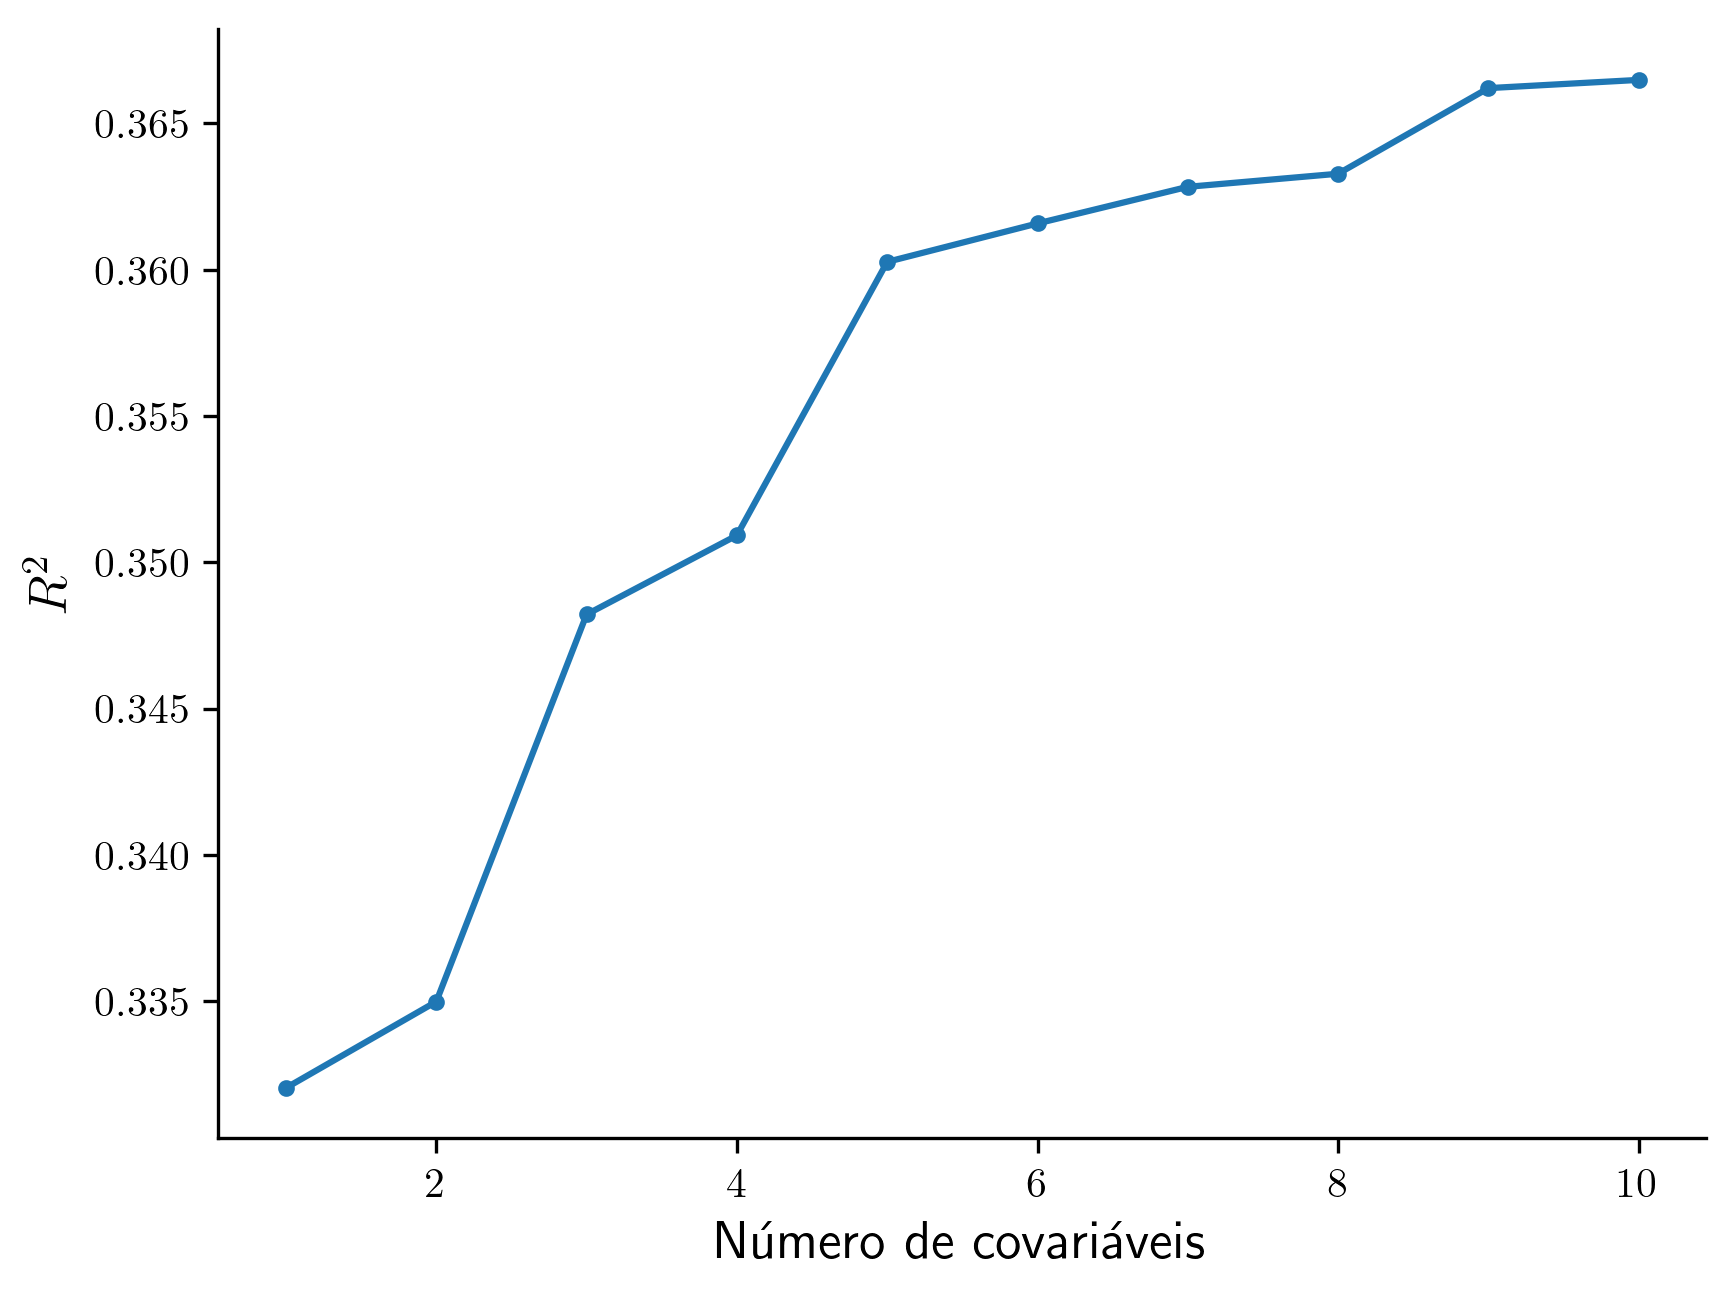

In [37]:
eq = 'sales ~ radio'
R2list = []
#R2adjustlist = []

for covar in covars[1:]:

    
    model = smf.ols(formula=eq, data=df_sales)

    result = model.fit()
    
    R2list.append(result.rsquared)
    #R2adjustlist.append(result.rsquared_adj)

    #print(eq)
    #print('p-value: ')
    #print(result.pvalues)
    #print('R2: ',result.rsquared)
    #print(' ')
    
    eq = eq+' + '+covar
 
fig = plt.figure()
plt.plot(range(1,len(covars)),R2list,'.-')  
#plt.plot(range(1,len(covars)),R2adjustlist,'.-')  

for ax in fig.get_axes():

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
plt.xlabel(r'Número de covariáveis',fontsize=13)
plt.ylabel(r'$R^2$',fontsize=13)
plt.show()



In [38]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     10.93
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.32e-14
Time:                        07:25:20   Log-Likelihood:                -568.04
No. Observations:                 200   AIC:                             1158.
Df Residuals:                     189   BIC:                             1194.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3265      0.568     16.411      0.0